In [198]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm
import os


In [199]:
def initialisation(n0, n1, n2):
    #Cette fonction iniatilise les variables w et b avec des valeurs aleatoires
    W1 = np.random.randn(n1,n0)
    b1 = np.random.randn(n1, 1)
    W2 = np.random.randn(n2, n1)
    b2 = np.random.randn(n2, 1)
    params = {
        'w1': W1,
        'b1': b1,
        'w2': W2,
        'b2': b2
    }
    return params

In [200]:
def forward_propagation(X, params):
    Z1 = params['w1'].dot(X) + params['b1']
    A1 = 1/(1 + np.exp(-Z1))
    Z2 = params['w2'].dot(A1) + params['b2']
    A2 = 1/(1 + np.exp(-Z2))
    A = {
        'A1': A1,
        'A2': A2
    }
    return A

In [201]:
def cost_function(A, y):
    epsilon = 1e-15
    return 1/len(y)*np.sum(-y*np.log(A + epsilon) - (1 - y)*np.log(1 - A + epsilon))

In [202]:
def back_propagation(A, X, y, params):
    m = y.shape[1]
    dz2 = A['A2'] - y
    dw2 = 1/m * ( dz2.dot(A['A1'].T) )
    db2 = 1/m * np.sum(dz2, axis=1, keepdims=True)

    dz1 = np.dot(params['w2'].T, dz2) * A['A1'] * (1 - A['A1'])
    dw1 = 1/m * ( dz1.dot(X.T) )
    db1 = 1/m * np.sum(dz1, axis=1, keepdims=True)
    gradient = {
        'dw1': dw1,
        'db1': db1,
        'dw2': dw2,
        'db2': db2
    }
    return gradient

In [203]:
def udpate(gradient, params, rate_learning):
    W1 = params['w1'] - rate_learning * gradient['dw1']
    b1 = params['b1'] - rate_learning * gradient['db1']
    W2 = params['w2'] - rate_learning * gradient['dw2']
    b2 = params['b2'] - rate_learning * gradient['db2']
    params = {
        'w1': W1,
        'b1': b1,
        'w2': W2,
        'b2': b2
    }
    return params


In [204]:
def prediction(X, params):
    A = forward_propagation(X, params)
    return A['A2'] >= 0.5

In [205]:
def neural_network(X, Y, n1=2, nbr_iteration = 1000, rate_learning = 0.1):
    n0 = X.shape[0]
    n2 = X.shape[1]
    params = initialisation(n0, n1, n2)

    Lg_train = []
    acc_train = []
    Rate = 0
    for i in tqdm(range(nbr_iteration)):
        A = forward_propagation(X, params)      
        gradient = back_propagation(A, X, Y, params)  
        params = udpate(gradient, params, rate_learning)
        if i % 10 ==0:
            #for train
            Lg_train.append(cost_function(A['A2'], Y))
            y_pred = prediction(X, params)
            y = Y.flatten()
            Rate = accuracy_score(y, y_pred.flatten()[:y.shape[0]])
            acc_train.append(Rate)


        
    print(Rate)
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(Lg_train, label = 'Train Loss')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(acc_train, label = 'Train Acc')
    plt.legend()
    plt.show()
    return params

In [206]:
def save_model(params):
    
    with open('./datasets/deep_model.data', 'wb') as file:
        myPickler  = pickle.Pickler(params)
        myPickler.dump(params)
        file.close()

Dimension X:  (2, 100)

Dimension y:  (1, 100)


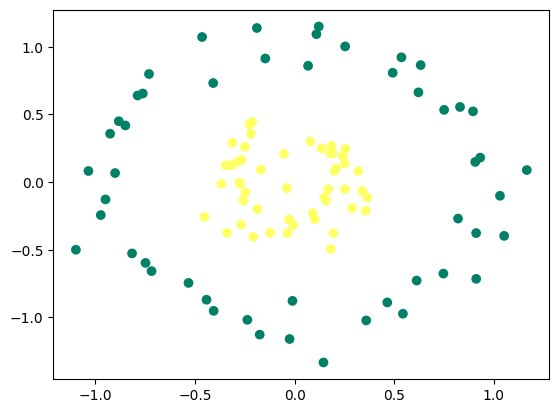

In [207]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape(1, y.shape[0])

print("Dimension X: ",X.shape)

print("\nDimension y: ",y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()




100%|██████████| 1000/1000 [00:00<00:00, 2984.14it/s]


0


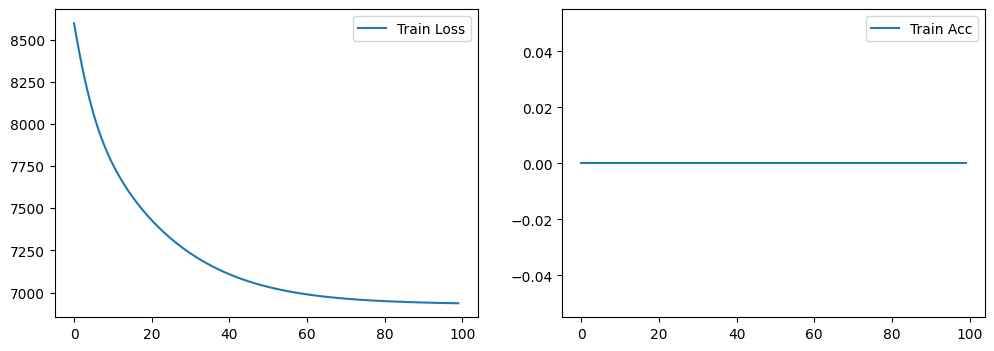

In [208]:
W, b = neural_network(X, y, n1=2)
save_model(W, b)